In [1]:
import nltk

In [5]:
text = nltk.word_tokenize('And now for something completely different')  # word_tokenize 分词
nltk.pos_tag(text)  # pos_tag 给一组数据打标签,text为列表

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [6]:
text = nltk.word_tokenize('They refuse to permit us to obtain the refuse permit')
nltk.pos_tag(text)  # pos_tag 传入的是字典

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [7]:
taggoed_open = nltk.tag.str2tuple('fly/HB')  # tag.str2tuple 自定义标签,传入的是字符串
taggoed_open

('fly', 'HB')

In [8]:
taggoed_open[0]

'fly'

In [9]:
text = 'I/1 like/2 English/3 very/4 much/5 '
[nltk.tag.str2tuple(s) for s in text.split()]

[('I', '1'), ('like', '2'), ('English', '3'), ('very', '4'), ('much', '5')]

In [10]:
text.split()

['I/1', 'like/2', 'English/3', 'very/4', 'much/5']

In [11]:
s ="I like English very much"
ss = s.split()
sss = ""
for i in range(0,len(ss)):
    sss = sss+ss[i]+"/"+str(i+1)+" "
sss

'I/1 like/2 English/3 very/4 much/5 '

# 读取已标注的语料库

In [12]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

# 简化的词性标记集

In [13]:
from nltk.corpus import brown

In [14]:
# brown_news_tagged = brown.tagged_words(categories='news',simplify_tags=True)
brown_news_tagged = brown.tagged_words(categories='news',tagset = 'universal')

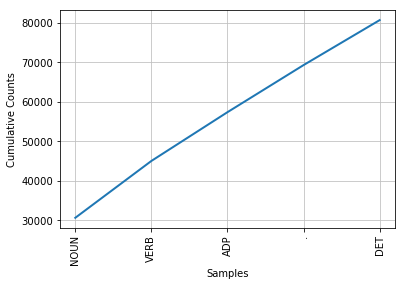

dict_keys(['DET', 'NOUN', 'ADJ', 'VERB', 'ADP', '.', 'ADV', 'CONJ', 'PRT', 'PRON', 'NUM', 'X'])

In [15]:
tag_fd = nltk.FreqDist(tag for (word,tag) in brown_news_tagged)
tag_fd.plot(5,cumulative=True)
tag_fd.keys()

In [16]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a=='often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [17]:
brown_lrnd_tagged = brown.tagged_words(categories='learned')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate() 

VBN  VB VBD  JJ  IN  QL   ,  CS  RB  AP VBG  RP VBZ QLP BEN WRB   .  TO  HV 
 15  10   8   5   4   3   3   3   3   1   1   1   1   1   1   1   1   1   1 


In [18]:
# 使用pos标记寻找三词短语
def process(sentence):
    for (w1,t1),(w2,t2),(w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('v') and t2 == 'TO' and t3.startswith('V')):
            print(w1,w2,w3)

In [19]:
for taggoed_sent in brown.tagged_sents():
    process(taggoed_sent)
    

# 5.3 使用python字典映射词及其属性
## python 字典

In [20]:
pos = {}
pos

{}

In [21]:
pos['colorless']='ADJ'  # ADJ为形容词
pos

{'colorless': 'ADJ'}

In [22]:
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'
pos

{'colorless': 'ADJ', 'furiously': 'ADV', 'ideas': 'N', 'sleep': 'V'}

In [23]:
# 按键检索值
pos['ideas']

'N'

In [24]:
# 字典转化为列表
list(pos)

['colorless', 'ideas', 'sleep', 'furiously']

In [25]:
sorted(pos)

['colorless', 'furiously', 'ideas', 'sleep']

In [26]:
[w for w in pos if w.endswith('s')]

['colorless', 'ideas']

In [27]:
# for 循环输出列表
for word in sorted(pos):
    print(word+':',pos[word])

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


In [28]:
# 利用字典方法访问链表
pos.keys()  # 访问键

dict_keys(['colorless', 'ideas', 'sleep', 'furiously'])

In [29]:
pos.values()  # 访问值

dict_values(['ADJ', 'N', 'V', 'ADV'])

In [30]:
pos.items()   # 访问键值对

dict_items([('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')])

In [31]:
# 按第一个元素排序元组
for key,values in sorted(pos.items()):
    print(key + ':',values)

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


### 定义字典

In [32]:
pos = {'colorless':'ADJ','ideas':'N','sleep':'V','furiously':'ADV'}
pos

{'colorless': 'ADJ', 'furiously': 'ADV', 'ideas': 'N', 'sleep': 'V'}

In [33]:
pos = dict(colorless='ADJ',ideas='N',sleep='V',fiuriously='ADV')
pos

{'colorless': 'ADJ', 'fiuriously': 'ADV', 'ideas': 'N', 'sleep': 'V'}

### 默认字典

In [34]:
frequency = nltk.defaultdict(int)   # 参数int用来创建默认值
frequency['colorless'] = 4
frequency['ideas']   # 调用时没有参数，返回0

0

In [35]:
pos = nltk.defaultdict(list)
pos['sleep'] = ['N','V']
pos['ideas']   # 调用时没有参数，返回[]

[]

### 自定义默认值

In [36]:
pos = nltk.defaultdict(lambda: 'N')   # 默认值为N
pos['colorless'] = 'ADJ'
pos['blog']


'N'

In [37]:
pos.items()

dict_items([('colorless', 'ADJ'), ('blog', 'N')])

In [38]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = list(vocab)[:1000]
mapping = nltk.defaultdict(lambda:'UNK')
for v in v1000:
    mapping[v] = v
alice2 = [mapping[v] for v in alice]
alice[2][:100]

"'"

### 递增的更新词典

In [39]:
counts = nltk.defaultdict(int)

In [40]:
from nltk.corpus import brown

In [41]:
for (word,tag) in brown.tagged_words(categories='news'):
    counts[tag] += 1


In [42]:
list(counts)

['AT',
 'NP-TL',
 'NN-TL',
 'JJ-TL',
 'VBD',
 'NR',
 'NN',
 'IN',
 'NP$',
 'JJ',
 '``',
 "''",
 'CS',
 'DTI',
 'NNS',
 '.',
 'RBR',
 ',',
 'WDT',
 'HVD',
 'VBZ',
 'CC',
 'IN-TL',
 'BEDZ',
 'VBN',
 'NP',
 'BEN',
 'TO',
 'VB',
 'RB',
 'DT',
 'PPS',
 'DOD',
 'AP',
 'BER',
 'HV',
 'DTS',
 'VBG',
 'PPO',
 'QL',
 'JJT',
 'ABX',
 'NN-HL',
 'VBN-HL',
 'WRB',
 'CD',
 'MD',
 'BE',
 'JJR',
 'VBG-TL',
 'BEZ',
 'NN$-TL',
 'HVZ',
 'ABN',
 'PN',
 'PPSS',
 'PP$',
 'DO',
 'NN$',
 'NNS-HL',
 'WPS',
 '*',
 'EX',
 'VB-HL',
 ':',
 '(',
 ')',
 'NNS-TL',
 'NPS',
 'JJS',
 'RP',
 '--',
 'BED',
 'OD',
 'BEG',
 'AT-HL',
 'VBG-HL',
 'AT-TL',
 'PPL',
 'DOZ',
 'NP-HL',
 'NR$',
 'DOD*',
 'BEDZ*',
 ',-HL',
 'CC-TL',
 'MD*',
 'NNS$',
 'PPSS+BER',
 "'",
 'PPSS+BEM',
 'CD-TL',
 'RBT',
 '(-HL',
 ')-HL',
 'MD-HL',
 'VBZ-HL',
 'IN-HL',
 'JJ-HL',
 'PPLS',
 'CD-HL',
 'WPO',
 'JJS-TL',
 'ABL',
 'BER-HL',
 'PPS+HVZ',
 'VBD-HL',
 'RP-HL',
 'MD*-HL',
 'AP-HL',
 'CS-HL',
 'DT$',
 'HVN',
 'FW-IN',
 'FW-DT',
 'VBN-TL',
 'NR-TL',
 '

In [43]:
counts['N']

0

### 递增更新字典

In [44]:
from operator import itemgetter

In [45]:
sorted(counts.items(),key=itemgetter(1),reverse=True)

[('NN', 13162),
 ('IN', 10616),
 ('AT', 8893),
 ('NP', 6866),
 (',', 5133),
 ('NNS', 5066),
 ('.', 4452),
 ('JJ', 4392),
 ('CC', 2664),
 ('VBD', 2524),
 ('NN-TL', 2486),
 ('VB', 2440),
 ('VBN', 2269),
 ('RB', 2166),
 ('CD', 2020),
 ('CS', 1509),
 ('VBG', 1398),
 ('TO', 1237),
 ('PPS', 1056),
 ('PP$', 1051),
 ('MD', 1031),
 ('AP', 923),
 ('NP-TL', 741),
 ('``', 732),
 ('BEZ', 730),
 ('BEDZ', 716),
 ("''", 702),
 ('JJ-TL', 689),
 ('PPSS', 602),
 ('DT', 589),
 ('BE', 525),
 ('VBZ', 519),
 ('NR', 495),
 ('RP', 482),
 ('QL', 468),
 ('PPO', 412),
 ('WPS', 395),
 ('NNS-TL', 344),
 ('WDT', 343),
 ('BER', 328),
 ('WRB', 328),
 ('OD', 309),
 ('HVZ', 301),
 ('--', 300),
 ('NP$', 279),
 ('HV', 265),
 ('HVD', 262),
 ('*', 256),
 ('BED', 252),
 ('NPS', 215),
 ('BEN', 212),
 ('NN$', 210),
 ('DTI', 205),
 ('NP-HL', 186),
 ('ABN', 183),
 ('NN-HL', 171),
 ('IN-TL', 164),
 ('EX', 161),
 (')', 151),
 ('(', 148),
 ('JJR', 145),
 (':', 137),
 ('DTS', 136),
 ('JJT', 100),
 ('CD-TL', 96),
 ('NNS-HL', 92),
 ('

In [46]:
[t for t ,c in sorted(counts.items(),key=itemgetter(1),reverse=True)]

['NN',
 'IN',
 'AT',
 'NP',
 ',',
 'NNS',
 '.',
 'JJ',
 'CC',
 'VBD',
 'NN-TL',
 'VB',
 'VBN',
 'RB',
 'CD',
 'CS',
 'VBG',
 'TO',
 'PPS',
 'PP$',
 'MD',
 'AP',
 'NP-TL',
 '``',
 'BEZ',
 'BEDZ',
 "''",
 'JJ-TL',
 'PPSS',
 'DT',
 'BE',
 'VBZ',
 'NR',
 'RP',
 'QL',
 'PPO',
 'WPS',
 'NNS-TL',
 'WDT',
 'BER',
 'WRB',
 'OD',
 'HVZ',
 '--',
 'NP$',
 'HV',
 'HVD',
 '*',
 'BED',
 'NPS',
 'BEN',
 'NN$',
 'DTI',
 'NP-HL',
 'ABN',
 'NN-HL',
 'IN-TL',
 'EX',
 ')',
 '(',
 'JJR',
 ':',
 'DTS',
 'JJT',
 'CD-TL',
 'NNS-HL',
 'PN',
 'RBR',
 'VBN-TL',
 'ABX',
 'NN$-TL',
 'IN-HL',
 'DOD',
 'DO',
 'BEG',
 ',-HL',
 'VBN-HL',
 'AT-TL',
 'NNS$',
 'CD-HL',
 'JJS',
 'CC-TL',
 "'",
 'JJ-HL',
 'MD*',
 'VBZ-HL',
 'PPL',
 'PPSS+MD',
 'PPS+BEZ',
 'OD-TL',
 'DOZ',
 'VB-HL',
 'NR$',
 'FW-NN',
 'WP$',
 'PPLS',
 'ABL',
 'PPSS+BER',
 '(-HL',
 ')-HL',
 'NNS$-TL',
 '.-HL',
 'PPSS+HV',
 'PPSS+BEM',
 'HVN',
 'NPS$',
 'DO*',
 'FW-NN-TL',
 'VBG-TL',
 'DOD*',
 'RB-HL',
 'NPS-TL',
 'AT-HL',
 'FW-IN',
 'NR-TL',
 'HVG',
 'BEM',
 

In [47]:
pair = ('NP',8336)
pair[1]

8336

In [48]:
itemgetter(1)(pair)

8336

## 自动标注
### 正则表达式标注器

In [75]:
from nltk.corpus import brown

In [76]:
patterns=[
    (r'.*ing$','VBG'),#动词进行式
    (r'.*ed$','VBD'),#动词过去式
    (r'.*es$','VBZ'),#动词第三人称
    (r'.*ould$','MD'),
    (r'.*\'s$','NN$'),#所有格
    (r'.*s$','NNS'),#名词复数
    (r'.^-?[0-9]+(.[0-9]+)?$','CD'),
    (r'.*','NN')
]


In [77]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [79]:
regexp_tagger.evaluate(brown_tagged_sents)

0.1914195357718241

In [73]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [74]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

### 分离训练和测试数据

In [80]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [81]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

### 一般的N-gram的标注

In [82]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [83]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [84]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

### 组合标注器

In [105]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents,backoff=t0)
t2 = nltk.BigramTagger(train_sents,backoff=t1)
t3 = nltk.TrigramTagger(train_sents,backoff=t2)
t3.evaluate(test_sents)

0.843317053722715

### 存储标注器

In [107]:
from pickle import dump
output = open('t3.pkl', 'wb')
dump(t3, output, -1)
output.close()

In [108]:
from pickle import load
input = open('t3.pkl', 'rb')
tagger = load(input)
input.close()

In [109]:
text = """The board's action shows what free enterprise is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)
[('The', u'AT'),
 ("board's", u'NN$'),
 ('action', 'NN'),
 ('shows', u'NNS'),
 ('what', u'WDT'),
 ('free', u'JJ'),
]

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ')]

### 性能限制

In [98]:
cfd = nltk.ConditionalFreqDist( ((x[1],y[1],z[0]), z[1]) for sent in brown_tagged_sents for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

In [100]:
test_tags = [tag for sent in brown.sents(categories='editorial') for (word,tag) in t2.tag(sent)]
gold_tags = [tag for (word,tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### 跨句子边界标注

In [101]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

# 基于转换的标注